# Introducción a las matrices y las transformaciones

En esta sección veremos como representar puntos y vectores como matrices, así como las operaciones afines más comunes y su representación como matrices.

In [1]:
# Primero vamos a importar las bibliotecas necesarias

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
%matplotlib inline

## Introducción a las matrices

Una matriz es una tabla de números (o expresiones matemáticas) alineadas en filas y columnas.

- **La dimensión ($m \times n$) de una matriz** es el número de filas ($m$) por el número de columnas ($n$).

- En nuestro caso usaremos matrices $3x3$ en operaciones 2D y $4x4$ para representar operaciones geométricas en 3D.

Por ejemplo:
 $$
 M = 
   \begin{pmatrix}
   a & b & c \\
   d & e & f \\
   g & h & i \\
   \end{pmatrix}
$$

Usaremos la función shape para saber la forma que tienen nuestras matrices. Por ejemplo:
$$
v1 = (1, 2)
$$

$$
v2 = 
   \begin{pmatrix}
   1 \\
   2
   \end{pmatrix}
$$

In [2]:
v1 = np.array([1, 2])
v2 = np.array([[1,2]])

print("v1:")
print(" ",v1, v1.shape)
print("vector de 2 dimensiones")
print()
print("v2:")
print(" ",v2, v2.shape)
print("matriz de 1 columna y 2 filas")

v1:
  [1 2] (2,)
vector de 2 dimensiones

v2:
  [[1 2]] (1, 2)
matriz de 1 columna y 2 filas



Notamos $a_{i,j}$ al valor de la matriz que se encuentra en la fila ($i$) y la columna $j$). En el código lo encontraremos amenudo al revés 

```a[j][i]```

En Godot, por ejemplo, se nota como

```a.i.j```

## Multiplicación de matrices

El algoritmo estándar para multiplicar matrices sigue la regla: filas de A por columnas de B y luego sumar los datos. El resultado va en la fila (para A) y columna (para B) utilizada.

![](./img/MatrixMultiplication.png "")

Vamos a ver un ejemplo con $A \cdot B$, siendo
$$
A =  \begin{pmatrix}
   2 & 0 & 0 & 0\\
   0 & 1 & 0 & 0\\
   \end{pmatrix}
$$

y 

$$
B =  \begin{pmatrix}
   1 & 0 \\
   0 & 3 \\
   1 & 0 \\
   0 & 2 \\ 
   \end{pmatrix}
$$



$$
C = A \cdot B =
\begin{pmatrix}
   2 & 0 & 0 & 0\\
   0 & 1 & 0 & 0\\
   \end{pmatrix}
\cdot
\begin{pmatrix}
   1 & 0 \\
   0 & 3 \\
   1 & 0 \\
   0 & 2 \\ 
\end{pmatrix}
$$

$$
 C =
\begin{pmatrix}
   2 \cdot 1 + 0 \cdot 0 + 0 \cdot 0 + 0 \cdot 0 & 2 \cdot 0 + 0 \cdot 3 + 0 \cdot 0 + 0 \cdot 2 \\
   0 \cdot 1 + 1 \cdot 0 + 0 \cdot 0 + 0 \cdot 0 & 0 \cdot 0 + 1 \cdot 3 + 0 \cdot 0 + 0 \cdot 2 \\
\end{pmatrix}
$$
$$
 C  =
\begin{pmatrix}
   2 & 0 \\
   0 & 3
\end{pmatrix}
$$


In [3]:
A = np.array([
    [2, 0, 0, 0],
    [0, 1, 0, 0]
])

B = np.array([
    [1, 0],
    [0, 3],
    [1, 0],
    [0, 2]
])

filas_A, columnas_A = A.shape
filas_B, columnas_B = B.shape

# Crear la matriz resultante
C = np.zeros((filas_A, columnas_B))

# Recorrer cada fila de la matriz resultante
for i in range(filas_A):
    # Recorrer cada columna de la matriz resultante
    for j in range(columnas_B):
        # Multiplicar los elementos de la fila i de A con los elementos de la columna j de B
        # y sumar los productos
        for k in range(columnas_A):
            C[i, j] += A[i, k] * B[k, j]

print(f"El resultado A⋅B es C = \n {C}")

El resultado A⋅B es C = 
 [[2. 0.]
 [0. 3.]]


En realidad, podemos multiplicar matrices usando el operador ```@```, con lo que simplificaremos la notación.

En Godot podemos usar directamente el operador ```*``` para realizar las multiplicaciones entre matrices, o entre vectores y matrices (Godot ya se encarga de trasponer el vector, es decir, realizar la representación en columnas).

In [4]:
C = A @ B
print(f"El resultado A@B es C = \n {C}")

El resultado A@B es C = 
 [[2 0]
 [0 3]]


Recuerda que el orden de la multiplicación afecta al resultado (**la operación no es conmutativa**).

$$
A \cdot B =
\begin{pmatrix}
   2 & 0 & 0 & 0\\
   0 & 1 & 0 & 0\\
   \end{pmatrix}
\cdot
\begin{pmatrix}
   1 & 0 \\
   0 & 3 \\
   1 & 0 \\
   0 & 2 \\ 
\end{pmatrix}
   =
\begin{pmatrix}
   2 & 0 \\
   0 & 3
\end{pmatrix}
$$

$$
B \cdot A =
\begin{pmatrix}
   1 & 0 \\
   0 & 3 \\
   1 & 0 \\
   0 & 2 \\ 
\end{pmatrix}
\cdot
\begin{pmatrix}
   2 & 0 & 0 & 0\\
   0 & 1 & 0 & 0\\
   \end{pmatrix}
   =
\begin{pmatrix}
   2 & 0 & 0 & 0 \\
   0 & 3 & 0 & 0 \\
   2 & 0 & 0 & 0 \\
   0 & 2 & 0 & 0 \\
\end{pmatrix}
$$


In [5]:
print(f"A@B ≠ B@A\n")
print("A@B =\n", A@B)
print("B@A =\n", B@A)

A@B ≠ B@A

A@B =
 [[2 0]
 [0 3]]
B@A =
 [[2 0 0 0]
 [0 3 0 0]
 [2 0 0 0]
 [0 2 0 0]]


## Matriz identidad

Se denomina matriz identidad ($I$) a aquella que tiene toda la diagonal a 1 {$a_{i,j}=1$ $\forall i=j$, $a_{i,j}=0$ $\forall i \neq j$}. Por ejemplo, una matrix identidad 4x4 tendría la siguiente forma:

 $I = 
   \begin{pmatrix}
   1 & 0 & 0 & 0\\
   0 & 1 & 0 & 0\\
   0 & 0 & 1 & 0\\
   0 & 0 & 0 & 1
  \end{pmatrix}$

  Cualquier multiplicación por la identidad da el mismo resultado:

$$
  M \cdot I = I \cdot M = M
$$

# Transformaciones geométricas en 2D

Antes de continuar con las operaciones entre matrices, vamos a examinar como se realizan las transformaciones geométricas en dos dimensiones, y ver por qué las matrices juegan un papel importante en las transformaciones geométricas.

In [6]:
# Redefinimos la función de dibujado

def crearRejilla(title='$\mathbb{E}^2', rango=[-3, 3, -3, 3]):
    fig, ax = plt.subplots()
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.title(title)
    plt.axis(rango)  # Define los límites de los ejes [xmin, xmax, ymin, ymax]
    plt.grid(True)  # Mostrar cuadrícula
    return fig, ax

## Traslación

Ahora definimos un punto cualquiera $\mathbf{P} = (0.5, 1)$:

In [7]:
P = np.array([0.5, 1])

print(f"P = {P}")

P = [0.5 1. ]


Si lo dibujamos, veremos que podemos desplazarlo solamente sumando un valor a cada coordenada:

$$
P_{azul} = P + (1, 0)
$$

$$
P_{verde} = P + (1, 0)
$$

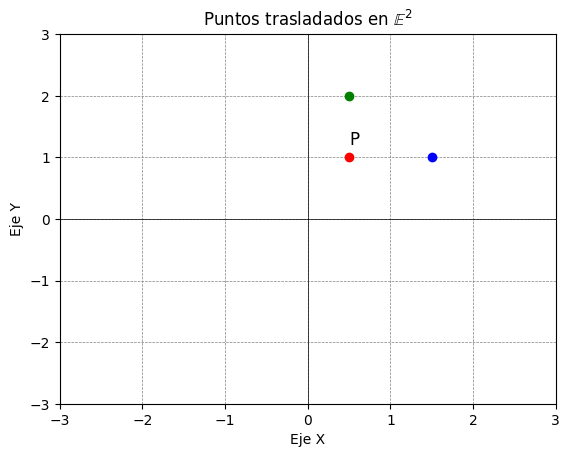

In [8]:
fig, ax = crearRejilla('Puntos trasladados en $\mathbb{E}^2$')
plt.plot(P[0], P[1], 'ro') # punto original en rojo
plt.text(P[0], P[1] * 1.2, "P", fontsize=12)
plt.plot(P[0]+1, P[1], 'bo')
plt.plot(P[0], P[1]+1, 'go')
plt.show()

Para desplazarlo en dirección contraria solamente hay que restar:
$$
P_{azul} = P + (-1, 0)
$$

$$
P_{verde} = P + (-1, 0)
$$

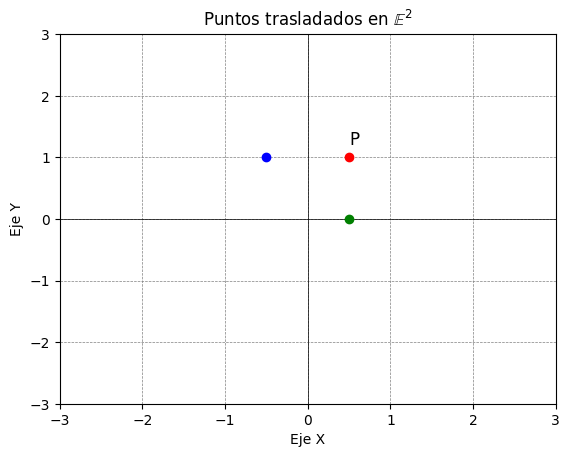

In [9]:
fig, ax = crearRejilla('Puntos trasladados en $\mathbb{E}^2$')
plt.plot(P[0], P[1], 'ro') # punto original en rojo
plt.text(P[0], P[1] * 1.2, "P", fontsize=12)
plt.plot(P[0]-1, P[1], 'bo')
plt.plot(P[0], P[1]-1, 'go')
plt.show()

Así que la operación de traslación ($T$) se puede definir así:

$T(\mathbf{P}, t) = \mathbf{P} + t$ con $\mathbf{P} \in \mathbb{E}^n$

## Escalado

De igual forma, podemos escalar los puntos con otra operación, la multiplicación. Para ello, vamos a definir cuatro puntos en el espacio formando una figura:

P1 = [0.5 1. ]
P2 = [-0.5 -1. ]
P3 = [-0.5  1. ]
P4 = [ 0.5 -1. ]


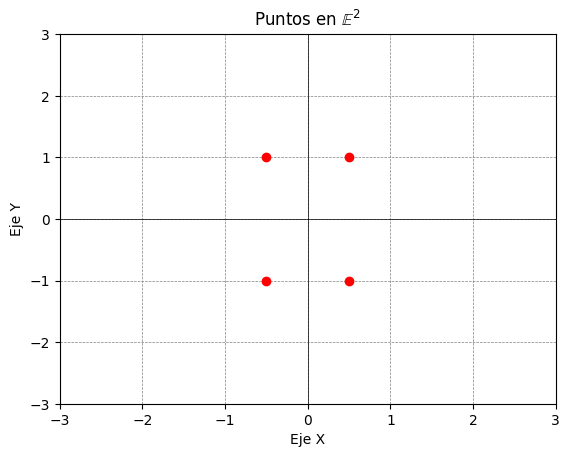

In [10]:
P1 = np.array([0.5, 1])
P2 = np.array([-0.5, -1])
P3 = np.array([-0.5, 1])
P4 = np.array([0.5, -1])

print(f"P1 = {P1}")
print(f"P2 = {P2}")
print(f"P3 = {P3}")
print(f"P4 = {P4}")

fix, ax = crearRejilla('Puntos en $\mathbb{E}^2$')
plt.plot(P1[0], P1[1], 'ro') # punto original en rojo
plt.plot(P2[0], P2[1], 'ro') # punto original en rojo
plt.plot(P3[0], P3[1], 'ro') # punto original en rojo
plt.plot(P4[0], P4[1], 'ro') # punto original en rojo
plt.show()

Ahora vamos a escalarlos, para ello multiplicaremos un valor escalar ($1.5$) por los puntos:

eP1 = [0.75 1.5 ]
eP2 = [-0.75 -1.5 ]
eP3 = [-0.75  1.5 ]
eP4 = [ 0.75 -1.5 ]


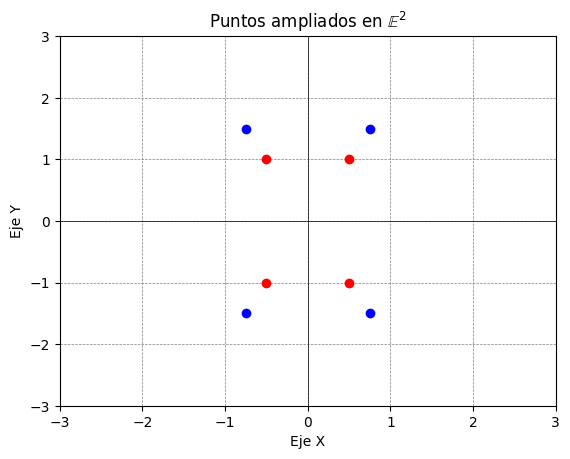

In [11]:
eP1 = P1 * 1.5
eP2 = P2 * 1.5
eP3 = P3 * 1.5
eP4 = P4 * 1.5

print(f"eP1 = {eP1}")
print(f"eP2 = {eP2}")
print(f"eP3 = {eP3}")
print(f"eP4 = {eP4}")

fig, ax = crearRejilla('Puntos ampliados en $\mathbb{E}^2$')
plt.plot(P1[0], P1[1], 'ro') # punto original en rojo
plt.plot(P2[0], P2[1], 'ro') # punto original en rojo
plt.plot(P3[0], P3[1], 'ro') # punto original en rojo
plt.plot(P4[0], P4[1], 'ro') # punto original en rojo

plt.plot(eP1[0], eP1[1], 'bo') # punto escalado en azul
plt.plot(eP2[0], eP2[1], 'bo') # punto escalado en azul
plt.plot(eP3[0], eP3[1], 'bo') # punto escalado en azul
plt.plot(eP4[0], eP4[1], 'bo') # punto escalado en azul

plt.show()

También podemos hacer las cosas más pequeñas escalando por un valor entre 0 y 1, en este caso, multiplicamos por $0.25$:

eP1 = [0.125 0.25 ]
eP2 = [-0.125 -0.25 ]
eP3 = [-0.125  0.25 ]
eP4 = [ 0.125 -0.25 ]


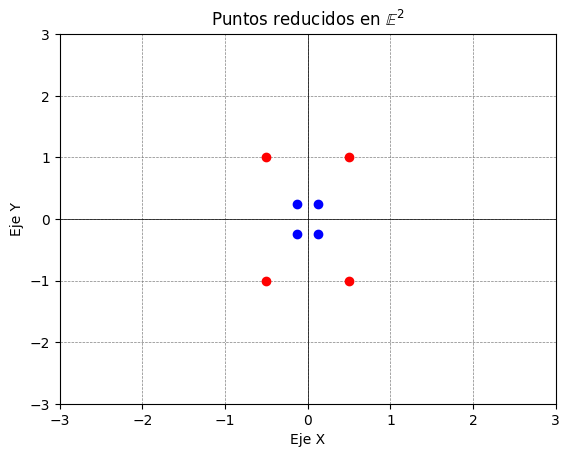

In [12]:
eP1 = P1 * 0.25
eP2 = P2 * 0.25
eP3 = P3 * 0.25
eP4 = P4 * 0.25

print(f"eP1 = {eP1}")
print(f"eP2 = {eP2}")
print(f"eP3 = {eP3}")
print(f"eP4 = {eP4}")

fig, ax = crearRejilla('Puntos reducidos en $\mathbb{E}^2$')
plt.plot(P1[0], P1[1], 'ro') # punto original en rojo
plt.plot(P2[0], P2[1], 'ro') # punto original en rojo
plt.plot(P3[0], P3[1], 'ro') # punto original en rojo
plt.plot(P4[0], P4[1], 'ro') # punto original en rojo

plt.plot(eP1[0], eP1[1], 'bo') # punto escalado en azul
plt.plot(eP2[0], eP2[1], 'bo') # punto escalado en azul
plt.plot(eP3[0], eP3[1], 'bo') # punto escalado en azul
plt.plot(eP4[0], eP4[1], 'bo') # punto escalado en azul

plt.show()

Fíjate como multiplicar con valores en $(0, 1]$ hace que se reduzca. De esta forma podríamos definir la operación de escalado (S) como:

$S(\mathbf{P}, t) = \mathbf{P} \cdot t$ con $\mathbf{P} \in \mathbb{E}^n$

## Rotación

Para la rotación podríamos jugar con las ecuaciones del círculo. ¿Recuerdas estas ecuaciones?

$x = \cos(\Theta)\cdot r$

$y = \sin(\Theta)\cdot r$

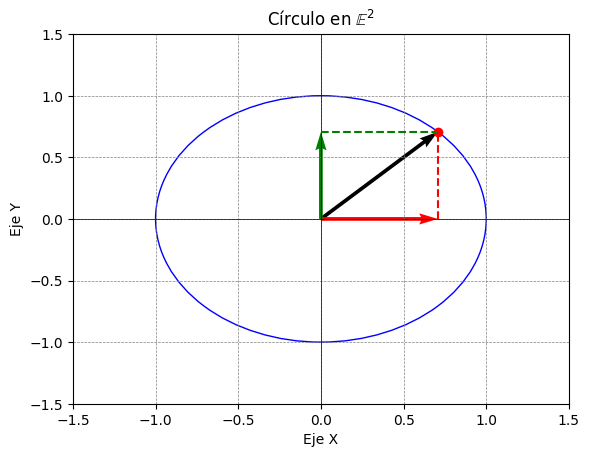

In [13]:
P = np.array([1, 1])
P = P/np.linalg.norm(P) # Punto en la diagonal, normalizado
radio = np.linalg.norm(P)
angulo = 45*np.pi/180

x = np.cos(angulo)*radio # en rojo
y = np.sin(angulo)*radio # en verde

fig, ax = crearRejilla('Círculo en $\mathbb{E}^2$', rango=[-1.5, 1.5, -1.5, 1.5])
circulo = plt.Circle((0, 0), 1, color='blue', fill=False)
ax.add_patch(circulo)
ax.plot(P[0], P[1], 'ro') # punto original en rojo
plt.plot([0, x], [y, y], color='green', linestyle='--')
plt.plot([x, x], [0, y], color='red', linestyle='--')
plt.quiver(0, 0, P[0], P[1], angles='xy', scale=1, scale_units='xy', color='black', label='Vector')
plt.quiver(0, 0, x, 0, angles='xy', scale=1, scale_units='xy', color='red', label='Vector')
plt.quiver(0, 0, 0, y, angles='xy', scale=1, scale_units='xy', color='green', label='Vector')

plt.show()

El punto $\mathbf{P}$ tiene un ángulo $\Theta_B = 45°$ Si queremos rotar el punto \mathbf{P} por ejemplo otros 45° ($Theta_A=45°$), entonces podemos decir que si:

$\mathbf{P}_x = \cos(\Theta_B)\cdot r$

$\mathbf{P}_y = \sin(\Theta_B)\cdot r$

entonces, el punto rotado $\mathbf{P}'$ un ángulo $\Theta_A$ es igual a:

$$
\mathbf{P_x}' = r \cdot \cos(\Theta_A+\Theta_B)
$$

$$
\mathbf{P_x}' = r \cdot (\cos \Theta_A \cos \Theta_B – \sin \Theta_A \sin \Theta_B)
$$

$$
\mathbf{P_x}' = r \cdot \cos \Theta_B \cos \Theta_A – r \cdot \sin \Theta_B \sin \Theta_A
$$

$$
\mathbf{P_x}' = \mathbf{P_x} \cos \Theta_A – \mathbf{P_y} \sin \Theta_A
$$

$$
\mathbf{P_y}' = r \cdot \sin(\Theta_A + \Theta_B)
$$

$$
\mathbf{P_y}' = r \cdot (\sin \Theta_A \cos \Theta_B + \cos \Theta_A \sin \Theta_B)
$$

$$
\mathbf{P_y}' = r \cdot \cos \Theta_B \sin \Theta_A + r \cdot \sin \Theta_B \cos \Theta_A
$$

$$
\mathbf{P_y}' = \mathbf{P_x} \sin \Theta_A + \mathbf{P_y} \cos \Theta_A
$$


Así pues, podemos definir la operación de rotación ($R$) como:

$R(\mathbf{P}, \Theta) = (\mathbf{P}_x \cos \Theta - \mathbf{P}_y \sin \Theta, \mathbf{P}_x \sin \Theta + \mathbf{P}_y \cos \Theta)$ con $\mathbf{P} \in \mathbb{E}^n$

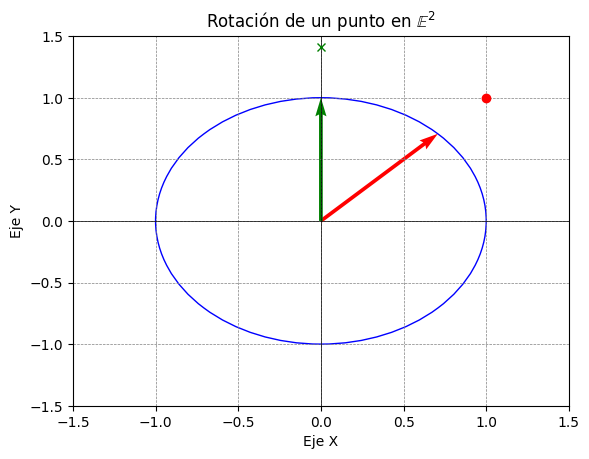

In [14]:
P1 = np.array([1, 1])

a = 45 * np.pi/180 # angulo a rotar

P2 = np.array([P1[0] * np.cos(a) - P1[1] * np.sin(a), P1[0]*np.sin(a)+P1[1]*np.cos(a)]) # rotado

x = np.cos(angulo)*radio # en rojo
y = np.sin(angulo)*radio # en verde

fig, ax = crearRejilla('Rotación de un punto en $\mathbb{E}^2$', rango=[-1.5, 1.5, -1.5, 1.5])
circulo = plt.Circle((0, 0), 1, color='blue', fill=False)
ax.add_patch(circulo)
ax.plot(P1[0], P1[1], 'ro') # punto original en rojo (o)
ax.plot(P2[0], P2[1], 'gx') # punto original en verde (x)
plt.quiver(0, 0, P1[0], P1[1], angles='xy', scale=np.linalg.norm(P1), scale_units='xy', color='red', label='Vector')
plt.quiver(0, 0, P2[0], P2[1], angles='xy', scale=np.linalg.norm(P2), scale_units='xy', color='green', label='Vector')

plt.show()

Como vemos, combinar transformaciones puede llegar a ser increiblemente complicado, es por eso que se busca unificar las transformaciones, y es aquí donde entran en juego las matrices.

## Matrices de transformación 2D

Vamos a comenzar con el escalado, supón la siguiente matriz identidad:

$$
I = 
\begin{pmatrix}
1 & 0 \\
0 & 1  \\
\end{pmatrix}
$$

mi punto $\mathbf{P}$, que usualmente lo escribo como $\mathbf{P} = (x, y)$, lo convertiré en una matriz de una única columna (estoy transponiendo la matriz, es decir, intercambiando filas y columnas):

$$
P = 
\begin{pmatrix}
x \\
y \\
\end{pmatrix}
$$

De forma que, como ya hemos visto:

$$
P = I \cdot P = 
\begin{pmatrix}
1 & 0 \\
0 & 1  \\
\end{pmatrix} 
\cdot
\begin{pmatrix}
x \\
y \\
\end{pmatrix}
= 
\begin{pmatrix}
x \\
y \\
\end{pmatrix}
$$

Fíjate que si modifico la matriz identidad, puedo crear un escalado fácilmente:

$$
S_s = 
\begin{pmatrix}
s_x & 0 \\
0 & s_y  \\
\end{pmatrix} 
$$

de esta forma:

$S(P, s) = S_s \cdot P$


In [15]:
def S(P, s):
    S_s = np.array([[s[0], 0], [0, s[1]]])
    return S_s@P

Escalado en 2D: [1.5 1.5]


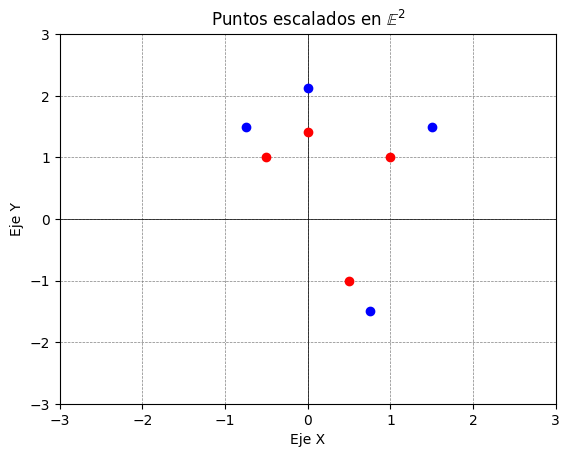

In [16]:
s = np.full([2], 1.5)
print("Escalado en 2D:", s)

eP1 = S(P1, s)
eP2 = S(P2, s)
eP3 = S(P3, s)
eP4 = S(P4, s)

crearRejilla('Puntos escalados en $\mathbb{E}^2$')
plt.plot(P1[0], P1[1], 'ro') # punto original en rojo
plt.plot(P2[0], P2[1], 'ro') # punto original en rojo
plt.plot(P3[0], P3[1], 'ro') # punto original en rojo
plt.plot(P4[0], P4[1], 'ro') # punto original en rojo

plt.plot(eP1[0], eP1[1], 'bo') # punto escalado en azul
plt.plot(eP2[0], eP2[1], 'bo') # punto escalado en azul
plt.plot(eP3[0], eP3[1], 'bo') # punto escalado en azul
plt.plot(eP4[0], eP4[1], 'bo') # punto escalado en azul

plt.show()

Vamos a definir la función para la matriz de rotación ahora:
$$
R_\Theta =
\begin{pmatrix}
\cos(\Theta) & -\sin(\Theta) \\
\sin(\Theta) & \cos(\Theta) \\
\end{pmatrix}
$$

de análoga forma al escalado:

$R(P, \theta) = R_\theta \cdot P$

In [17]:
def R(P, t):
    t = t * np.pi / 180
    R_t = np.array([
        [np.cos(t), -np.sin(t)], 
        [np.sin(t), np.cos(t)]
    ])
    return R_t@P

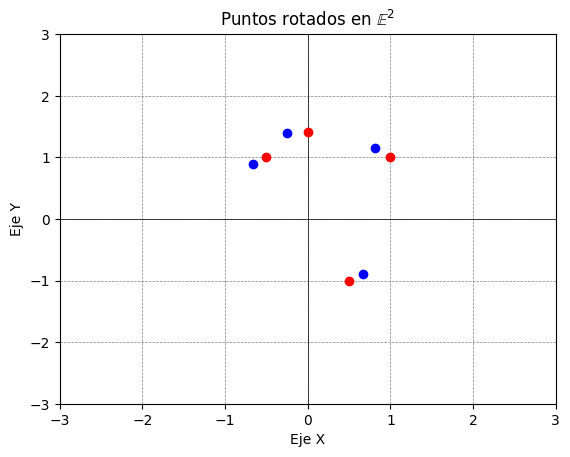

In [18]:
# Rotamos 10° por ejemplo, t es el ángulo a rotar
t = 10

rP1 = R(P1, t)
rP2 = R(P2, t)
rP3 = R(P3, t)
rP4 = R(P4, t)

crearRejilla('Puntos rotados en $\mathbb{E}^2$')
plt.plot(P1[0], P1[1], 'ro') # punto original en rojo
plt.plot(P2[0], P2[1], 'ro') # punto original en rojo
plt.plot(P3[0], P3[1], 'ro') # punto original en rojo
plt.plot(P4[0], P4[1], 'ro') # punto original en rojo

plt.plot(rP1[0], rP1[1], 'bo') # punto escalado en azul
plt.plot(rP2[0], rP2[1], 'bo') # punto escalado en azul
plt.plot(rP3[0], rP3[1], 'bo') # punto escalado en azul
plt.plot(rP4[0], rP4[1], 'bo') # punto escalado en azul

plt.show()

### Matrices homogéneas

Pero, ¿qué pasa con la traslación? Las matrices $2 \times 2$ no permiten que podamos sumar elementos, así que hay que añadir una tercera dimensión (es lo que más adelante llamaremos poner el punto en **coordenadas homogéneas**):

$$
I = 
\begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 
\end{pmatrix}
$$

mi punto $\mathbf{P}$, que usualmente lo escribo como $\mathbf{P} = (x, y)$, pasaría a ser una matriz de una única columna:

$$
P = 
\begin{pmatrix}
x \\
y \\
1 \\
\end{pmatrix}
$$

De forma que para trasladar el usamos:

$$
T_t = 
\begin{pmatrix}
1 & 0 & t_x \\
0 & 1 & t_y \\
0 & 0 & 1 
\end{pmatrix}
$$

Esto es lo que se denomina usar **transformaciones afines con matrices**. Para ello usamos coordenadas homogéneas. Esto significa representar un vector 2D $(x, y)$ como un vector de 3 dimensiones con la última coordenada siempre a 1: $(x, y, 1)$.

Trasladar el punto rojo ($\mathbf{P}_{rojo}$) implica hacer la siguiente transformación:

$$
 \mathbf{P}_{verde} = T_t \cdot \mathbf{P}_{rojo}
$$


In [19]:
def T(P, t):
    T_t = np.array([
        [1, 0, t[0]],
        [0, 1, t[1]],
        [0, 0, 1]
    ])
    return T_t@P

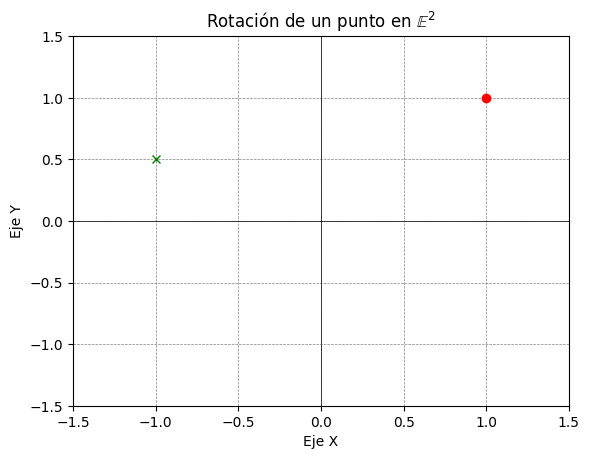

In [20]:
P1 = np.array([1, 1, 1])

P2 = T(P1, np.array([-2, -0.5]))

fig, ax = crearRejilla('Rotación de un punto en $\mathbb{E}^2$', rango=[-1.5, 1.5, -1.5, 1.5])
ax.plot(P1[0], P1[1], 'ro') # punto original en rojo (o)
ax.plot(P2[0], P2[1], 'gx') # punto trasladado en verde (x)

plt.show()

Si queremos ver la dirección de traslación, podemos restar ambos puntos como vimos previamente.

$\vec{d_{P_{verde}P_{rojo}}} = \mathbf{P}_{verde} - \mathbf{P}_{rojo}$

¡Pero recuerda siempre normalizar!

$\vec{d_{P1P2}} = \frac{\mathbf{P2} - \mathbf{P1}}{\| \mathbf{P2} - \mathbf{P1}\|}$



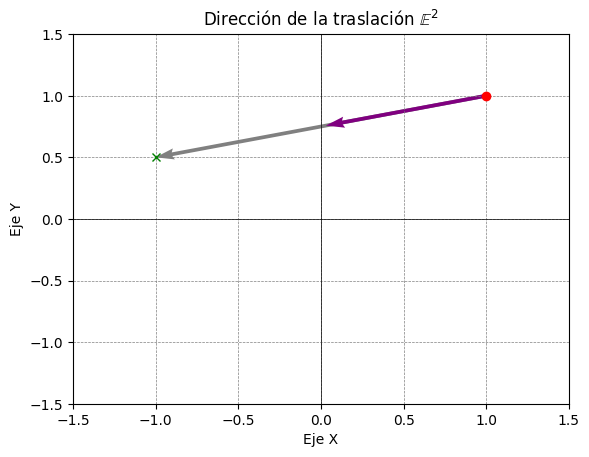

In [21]:
d_no_norm = (P2 - P1) # gris
d = (P2 - P1) / np.linalg.norm(P2 - P1) # morado

fig, ax = crearRejilla('Dirección de la traslación $\mathbb{E}^2$', rango=[-1.5, 1.5, -1.5, 1.5])
ax.plot(P1[0], P1[1], 'ro') # punto original en rojo (o)
ax.plot(P2[0], P2[1], 'gx') # punto trasladado en verde (x)
ax.quiver(P1[0], P1[1], d_no_norm[0], d_no_norm[1], angles='xy', scale=1, scale_units='xy', color='gray', label='Vector')
ax.quiver(P1[0], P1[1], d[0], d[1], angles='xy', scale=1, scale_units='xy', color='purple', label='Vector')

plt.show()

Vamos a redefinir todas las operaciones anteriores como matrices $3 \times 3$:

$$
R_\theta = 
\begin{pmatrix}
\cos \theta & -\sin \theta & 0 \\
\sin \theta & \cos \theta & 0 \\
0 & 0 & 1 
\end{pmatrix}
$$

$$
S_s = 
\begin{pmatrix}
s_x & 0 & 0 \\
0 & s_y & 0 \\
0 & 0 & 1
\end{pmatrix}
$$


In [22]:
def R(P, t):
    t = t * np.pi / 180
    R_t = np.array([
        [np.cos(t), -np.sin(t), 0], 
        [np.sin(t), np.cos(t), 0],
        [0, 0, 1]
    ])
    return R_t@P

In [23]:
def S(P, s):
    S_s = np.array([
        [s[0], 0, 0], 
        [0, s[1], 0],
        [0, 0, 1]
    ])
    return S_s@P

Ahora podemos combinarlas, vamos a crear una lista de 36 puntos siguiendo esta ecuación:

$$
P_\theta = (0.5 r \cdot \cos(\theta), 2r \cdot \sin(\theta))
$$

con $r$ siendo el radio.

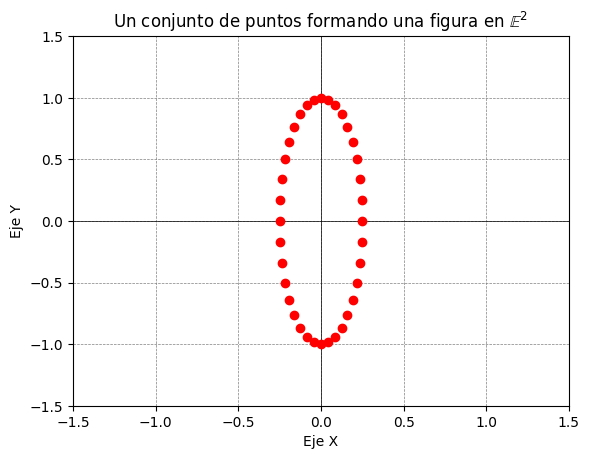

In [24]:
num_puntos = 36
r = 0.5
puntos = np.array([[r * np.cos(theta)*0.5, r * np.sin(theta)*2, 1] for theta in np.linspace(0, 2*np.pi, num_puntos, endpoint=False)])

fig, ax = crearRejilla('Un conjunto de puntos formando una figura en $\mathbb{E}^2$', rango=[-1.5, 1.5, -1.5, 1.5])
for P in puntos:
    ax.plot(P[0], P[1], 'ro')


Vamos a jugar un poco aplicando un escalado, luego una rotación y finalmente una traslación:

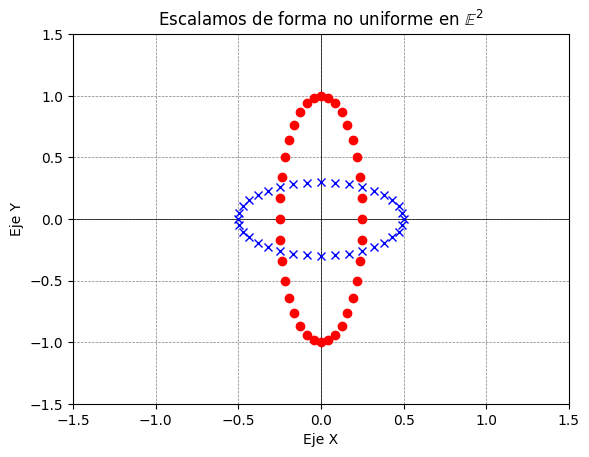

In [25]:
# Aplicamos un escalado: S⋅P

spuntos = [S(P, np.array([2, 0.3])) for P in puntos]

fig, ax = crearRejilla('Escalamos de forma no uniforme en $\mathbb{E}^2$', rango=[-1.5, 1.5, -1.5, 1.5])
for P in puntos:
    ax.plot(P[0], P[1], 'ro')
for P in spuntos:
    ax.plot(P[0], P[1], 'bx')


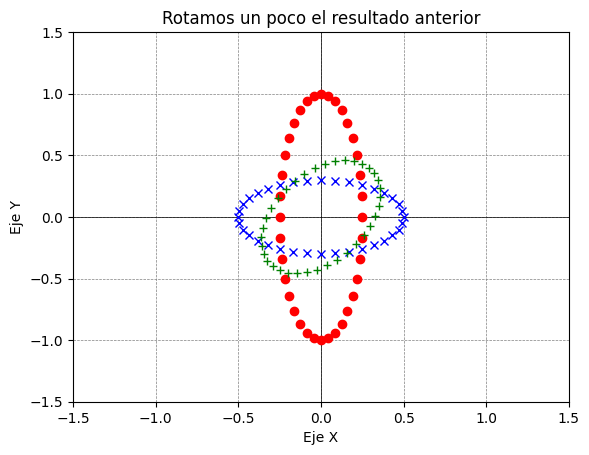

In [26]:
# Aplicamos una rotación: R⋅(S⋅P)

rpuntos = [R(P, 60) for P in spuntos]

fig, ax = crearRejilla('Rotamos un poco el resultado anterior', rango=[-1.5, 1.5, -1.5, 1.5])
for P in puntos:
    ax.plot(P[0], P[1], 'ro')
for P in spuntos:
    ax.plot(P[0], P[1], 'bx')
for P in rpuntos:
    ax.plot(P[0], P[1], 'g+')


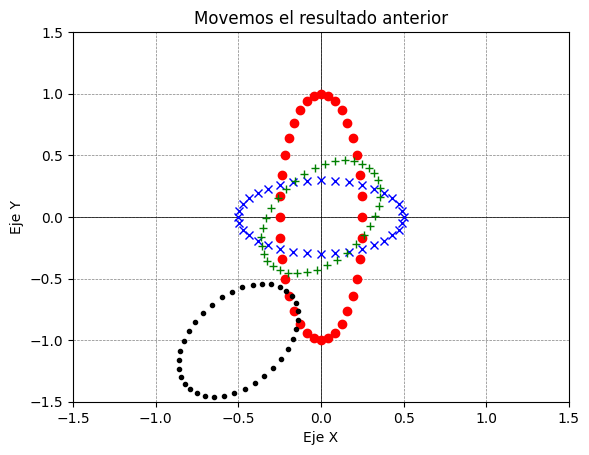

In [27]:
# Aplicamos una traslación: T⋅(R⋅(S⋅P))
tpuntos = [T(P, np.array([-0.5, -1])) for P in rpuntos]

fig, ax = crearRejilla('Movemos el resultado anterior', rango=[-1.5, 1.5, -1.5, 1.5])
for P in puntos:
    ax.plot(P[0], P[1], 'ro')
for P in spuntos:
    ax.plot(P[0], P[1], 'bx')
for P in rpuntos:
    ax.plot(P[0], P[1], 'g+')
for P in tpuntos:
    ax.plot(P[0], P[1], 'black', marker='.')

Lo mejor es que podemos aprovechar la asociatividad de las matrices:

$$
P' = S \cdot R \cdot T \cdot P = S \cdot (R \cdot (T \cdot P)) = (S \cdot R \cdot T) \cdot P 
$$


Fíjate bien. Vamos a crear una función genérica que multiplique matrices llamada ```Mult```:

In [28]:
def Mult(M1, M2):
    return M1@M2

Ahora vamos a crear funciones que creen nuestras matrices de transformación anteriores:

```Matriz_S```, ```Matriz_R```, y ```Matriz_T```.

In [29]:
def Matriz_S(s):
    return np.array([
        [s[0], 0, 0], 
        [0, s[1], 0],
        [0, 0, 1]
    ])
    
def Matriz_R(t):
    t = t * np.pi / 180
    return np.array([
        [np.cos(t), -np.sin(t), 0], 
        [np.sin(t), np.cos(t), 0],
        [0, 0, 1]
    ])
    
def Matriz_T(t):
    return np.array([
        [1, 0, t[0]],
        [0, 1, t[1]],
        [0, 0, 1]
    ])

Ahora vamos a componerlas entre sí:

```M = Matriz_T(Matriz_R(Matriz_S))```

fíjate que esto es equivalente a esto:

M = T_t \cdot R_\theta \cdot S_s$

In [30]:
escalado = Matriz_S(np.array([2, 0.3]))
rotacion = Matriz_R(60)
traslacion = Matriz_T(np.array([-0.5, -1]))

print("Escalado:\n", escalado)
print("Rotación:\n", rotacion)
print("Traslación:\n", traslacion)

Escalado:
 [[2.  0.  0. ]
 [0.  0.3 0. ]
 [0.  0.  1. ]]
Rotación:
 [[ 0.5       -0.8660254  0.       ]
 [ 0.8660254  0.5        0.       ]
 [ 0.         0.         1.       ]]
Traslación:
 [[ 1.   0.  -0.5]
 [ 0.   1.  -1. ]
 [ 0.   0.   1. ]]


In [31]:
M = Mult(rotacion, escalado)
M = Mult(traslacion, M)

print(M)

[[ 1.         -0.25980762 -0.5       ]
 [ 1.73205081  0.15       -1.        ]
 [ 0.          0.          1.        ]]


Ahora la aplicamos al punto, simplemente multiplicando:

$$
P' = M \cdot P
$$

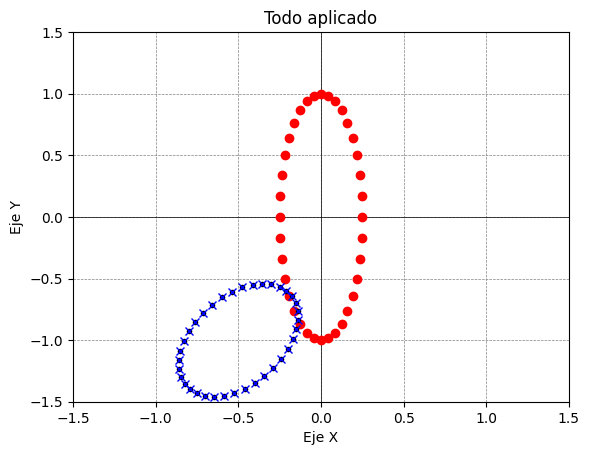

In [32]:
mpuntos = [Mult(M, P) for P in puntos]

fig, ax = crearRejilla('Todo aplicado', rango=[-1.5, 1.5, -1.5, 1.5])
for P in puntos:
    ax.plot(P[0], P[1], 'ro')
for P in tpuntos:
    ax.plot(P[0], P[1], 'black', marker='.') # antiguos puntos para comparar
for P in mpuntos:
    ax.plot(P[0], P[1], 'blue', marker='x') # nuevos puntos

Vemos como el resultado es el mismo. Si lo ves más claro, se puede hacer la multiplicación a mano en lugar de usar las funciones:

In [33]:
M1 = traslacion @ rotacion @ escalado

print(M1)

[[ 1.         -0.25980762 -0.5       ]
 [ 1.73205081  0.15       -1.        ]
 [ 0.          0.          1.        ]]


Fíjate que las operaciones no son conmutativas:

$T_t \cdot R_\theta \cdot S_s \neq S_s \cdot R_\theta \cdot T_t$

In [34]:
M2 =  escalado @ rotacion @ traslacion

print(M2)

[[ 1.         -1.73205081  1.23205081]
 [ 0.25980762  0.15       -0.27990381]
 [ 0.          0.          1.        ]]


Las operaciones pueden cancelarse si:

1. Se traslada la misma cantidad en sentido contrario (cambio de signo).
2. Se rota la misma cantidad en sentido contrario (cambio de signo).
3. Se escala el valor inverso (si escalamos $s$ y volvemos a escalar $1/s$)

In [35]:
M1 = Matriz_T(np.array([-0.5, -1]))
M2 = Matriz_T(np.array([0.5, 1]))

print(M1 @ M2)

M1 = Matriz_S(np.array([1/2, 2]))
M2 = Matriz_S(np.array([2, 1/2]))

print(M1 @ M2)

M1 = Matriz_R(90)
M2 = Matriz_R(-90)

print(M1 @ M2)


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


------

Autor: **Germán Arroyo**

[Creative Commons BY 4.0](https://creativecommons.org/licenses/by/4.0/) ![](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by.svg)